# BUILDING A CONVOLUTIONAL NEURAL NETWORK FROM SCRATCH

_**Building a Convolutional Neural Network (CNN) from Scratch on MNIST dataset and Evaluating its Performance.**_

This experiment uses MNIST dataset that consists of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [42]:
# Imports required modules and methods

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading & Analyzing Data

In [2]:
# Loads MNIST dataset
# NOTE: Downloading for the first time may take few minutes to complete

mnist = tf.keras.datasets.mnist.load_data()

In [3]:
# Considering dataset is organized in tuple, items are referenced as follows
(X_train_full, y_train_full), (X_test, y_test) = mnist

In [4]:
# Checks the shape of the datasets

print("Full training set shape:", X_train_full.shape)
print("Test set shape:", X_test.shape)

Full training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [16]:
# Checks the type of the array
X_train_full.dtype

dtype('uint8')

## Preprocessing Data

In [17]:
# As with dtype 'uint8', the data can range from 0 to 255, it transforms the data to fit 
# within a specific range like between 0 and 1, in this case, for effective neural network model training

X_train_full = X_train_full / 255.
X_test = X_test / 255.

In [18]:
# Splits train dataset further with stratification to seperate 5000 instances to be used as validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [33]:
# To match the input shape requirement of the CNN model, a channel dimention gets added to each dataset

X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [34]:
# Checks for the updated shape
X_train.shape

(55000, 28, 28, 1)

## Modeling

**NOTE:** To make it possible to train the model on CPU and within permitted timeline in an classroom setting, the model complexity was kept low by setting relatively lesser number of outputs in the hidden layers. The below model's prediction performance can be improved to an extent by setting more number of outputs in those layers, but in this case, the training should be over accelerated hardware such as GPU(s) to complete training faster.

In [49]:
# Sets the global random seed for operations that rely on a random seed
tf.random.set_seed(42)

# Creates CNN model by having convoluted, pooling, dropout and dense layer in the specified order for this experiment.
# Each convoluted layer is further initialized with specific kernel size, padding, activation and initialization.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Sets the model optimizer and compiles it with specific loss function and metric
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [50]:
# Fits the model with model checkpoint and early stopping configured
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val),
                    callbacks=[
                        tf.keras.callbacks.ModelCheckpoint("./model_weights/my_mnist_model.keras", save_best_only=True),
                        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
                    ])

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8440 - loss: 0.4934 - val_accuracy: 0.9782 - val_loss: 0.0715
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9575 - loss: 0.1409 - val_accuracy: 0.9848 - val_loss: 0.0576
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9692 - loss: 0.1036 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9737 - loss: 0.0877 - val_accuracy: 0.9886 - val_loss: 0.0472
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9763 - loss: 0.0769 - val_accuracy: 0.9854 - val_loss: 0.0496
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9786 - loss: 0.0669 - val_accuracy: 0.9876 - val_loss: 0.0413
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9811 - loss: 0.0594 - val_accuracy: 0.9888 - val_loss: 0.0397
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9821 -

In [51]:
# Saves the trained model for later reference
# NOTE: Make sure the folder "models" exists under the current working directory

model.save("./models/my_mnist_cnn_model.keras")

### Performance Analysis
Visualizes the learning progress and finally evaluates model's performance on test set

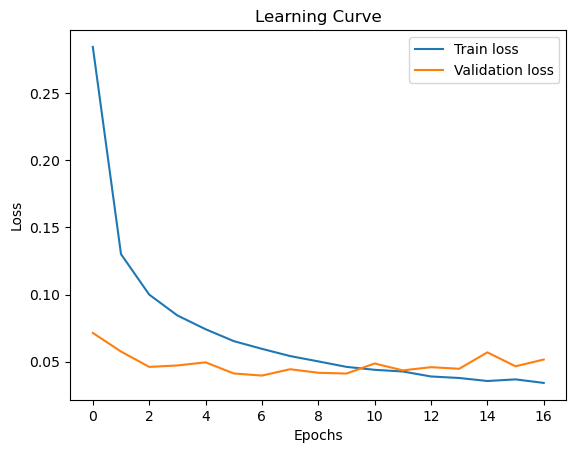

In [52]:
# Plots the learning curve of the above model

plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curve")

plt.show()

In [ ]:
# Evaluates the model on test set
model_test_performance = model.evaluate(X_test, y_test)

print("Test Performance [Accuracy]: {:.3f}")
print("{:.3f} [Model without BN layers]".format(model_test_performance[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0407


[0.03556995838880539, 0.9904000163078308]

**Observations:**

- Model training was stopped after 16th epochs considering no improvement over previous best performance for specified number of training iterations (epochs).

- The best validation performance was observed during 6th ecochs and the model started overfitting beyond that.

- The test set performance by the best model was 99.04%.

